In [11]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [12]:
'''
加载um数据
'''
um_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg4_train_umfeatures.npy')
um_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg4_train_umlabels.npy')
um_train_features = np.squeeze(um_train_features)
print("um_train_features.shape:", um_train_features.shape)
print("um_train_labels.shape", um_train_labels.shape)

um_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg4_test_umfeatures.npy')
um_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg4_test_umlabels.npy')
um_test_features = np.squeeze(um_test_features)
print("um_test_features.shape:", um_test_features.shape)
print("um_test_labels.shape", um_test_labels.shape)


data = np.vstack((um_train_features, um_test_features))
label = np.vstack((um_train_labels, um_test_labels))
print('data', data.shape)
print('label', label.shape)

um_train_features.shape: (25456, 1000)
um_train_labels.shape (25456, 1)
um_test_features.shape: (5920, 1000)
um_test_labels.shape (5920, 1)
data (31376, 1000)
label (31376, 1)


In [13]:
# from sklearn import svm
# classifier = svm.SVC()
# classifier.fit(um_train_features, um_train_labels)
# classifier.score(um_test_features,um_test_labels)

In [14]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, MaxPooling1D
#x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)


model = Sequential()
model.add(Dense(800, activation='relu', input_dim=1000))
#model.add(Dropout(0.5))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=um_train_features, y=um_train_labels, batch_size=64, epochs=300, shuffle=True, verbose=1, 
               validation_data=(um_test_features, um_test_labels))

Train on 25456 samples, validate on 5920 samples
Epoch 1/300
25456/25456 [==============================] - 3s 134us/step - loss: 0.6578 - accuracy: 0.5975 - val_loss: 0.8206 - val_accuracy: 0.5076
Epoch 2/300
25456/25456 [==============================] - 3s 127us/step - loss: 0.6235 - accuracy: 0.6380 - val_loss: 0.6887 - val_accuracy: 0.5613
Epoch 3/300
25456/25456 [==============================] - 3s 130us/step - loss: 0.6042 - accuracy: 0.6515 - val_loss: 0.6400 - val_accuracy: 0.6728
Epoch 4/300
25456/25456 [==============================] - 3s 134us/step - loss: 0.5928 - accuracy: 0.6659 - val_loss: 0.6966 - val_accuracy: 0.5865
Epoch 5/300
25456/25456 [==============================] - 3s 133us/step - loss: 0.5839 - accuracy: 0.6754 - val_loss: 0.7560 - val_accuracy: 0.5730
Epoch 6/300
25456/25456 [==============================] - 3s 131us/step - loss: 0.5776 - accuracy: 0.6815 - val_loss: 0.6484 - val_accuracy: 0.6429
Epoch 7/300
25456/25456 [==============================] 

25456/25456 [==============================] - 3s 131us/step - loss: 0.3234 - accuracy: 0.8552 - val_loss: 1.1533 - val_accuracy: 0.5395
Epoch 56/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.3192 - accuracy: 0.8574 - val_loss: 1.0326 - val_accuracy: 0.6118
Epoch 57/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.3259 - accuracy: 0.8556 - val_loss: 0.8962 - val_accuracy: 0.6187
Epoch 58/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.3099 - accuracy: 0.8612 - val_loss: 0.8768 - val_accuracy: 0.6267
Epoch 59/300
25456/25456 [==============================] - 3s 133us/step - loss: 0.3079 - accuracy: 0.8653 - val_loss: 0.7883 - val_accuracy: 0.6480
Epoch 60/300
25456/25456 [==============================] - 3s 133us/step - loss: 0.3074 - accuracy: 0.8642 - val_loss: 0.9552 - val_accuracy: 0.5971
Epoch 61/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.3033 - accuracy: 0.8662 - val

25456/25456 [==============================] - 3s 135us/step - loss: 0.1408 - accuracy: 0.9423 - val_loss: 1.0950 - val_accuracy: 0.6465
Epoch 110/300
25456/25456 [==============================] - 3s 133us/step - loss: 0.1372 - accuracy: 0.9438 - val_loss: 1.0236 - val_accuracy: 0.6635
Epoch 111/300
25456/25456 [==============================] - 3s 133us/step - loss: 0.1439 - accuracy: 0.9431 - val_loss: 1.6355 - val_accuracy: 0.6103
Epoch 112/300
25456/25456 [==============================] - 3s 135us/step - loss: 0.1289 - accuracy: 0.9492 - val_loss: 1.4285 - val_accuracy: 0.6348
Epoch 113/300
25456/25456 [==============================] - 3s 136us/step - loss: 0.1176 - accuracy: 0.9541 - val_loss: 1.3846 - val_accuracy: 0.6223
Epoch 114/300
25456/25456 [==============================] - 4s 140us/step - loss: 0.1197 - accuracy: 0.9517 - val_loss: 1.1612 - val_accuracy: 0.6530
Epoch 115/300
25456/25456 [==============================] - 3s 129us/step - loss: 0.2570 - accuracy: 0.9075

25456/25456 [==============================] - 3s 130us/step - loss: 0.0242 - accuracy: 0.9935 - val_loss: 2.0291 - val_accuracy: 0.6340
Epoch 164/300
25456/25456 [==============================] - 3s 129us/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 1.6354 - val_accuracy: 0.6367
Epoch 165/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 1.9767 - val_accuracy: 0.6361
Epoch 166/300
25456/25456 [==============================] - 3s 131us/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 1.8629 - val_accuracy: 0.6485
Epoch 167/300
25456/25456 [==============================] - 3s 130us/step - loss: 0.1914 - accuracy: 0.9212 - val_loss: 1.7509 - val_accuracy: 0.6220
Epoch 168/300
25456/25456 [==============================] - 3s 132us/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 2.3773 - val_accuracy: 0.5949
Epoch 169/300
25456/25456 [==============================] - 3s 131us/step - loss: 0.0765 - accuracy: 0.9716

25456/25456 [==============================] - 4s 139us/step - loss: 3.9308e-04 - accuracy: 1.0000 - val_loss: 2.7969 - val_accuracy: 0.6490
Epoch 217/300
25456/25456 [==============================] - 3s 136us/step - loss: 3.8410e-04 - accuracy: 1.0000 - val_loss: 2.8198 - val_accuracy: 0.6481
Epoch 218/300
25456/25456 [==============================] - 4s 144us/step - loss: 3.7769e-04 - accuracy: 1.0000 - val_loss: 2.8269 - val_accuracy: 0.6481
Epoch 219/300
25456/25456 [==============================] - 3s 133us/step - loss: 3.7155e-04 - accuracy: 1.0000 - val_loss: 2.8365 - val_accuracy: 0.6465
Epoch 220/300
25456/25456 [==============================] - 3s 134us/step - loss: 3.6323e-04 - accuracy: 1.0000 - val_loss: 2.8219 - val_accuracy: 0.6497
Epoch 221/300
25456/25456 [==============================] - 3s 134us/step - loss: 3.5590e-04 - accuracy: 1.0000 - val_loss: 2.8273 - val_accuracy: 0.6495
Epoch 222/300
25456/25456 [==============================] - 3s 134us/step - loss: 3

Epoch 269/300
25456/25456 [==============================] - 3s 132us/step - loss: 1.8681e-04 - accuracy: 1.0000 - val_loss: 3.0490 - val_accuracy: 0.6478
Epoch 270/300
25456/25456 [==============================] - 3s 132us/step - loss: 1.8545e-04 - accuracy: 1.0000 - val_loss: 3.0300 - val_accuracy: 0.6492
Epoch 271/300
25456/25456 [==============================] - 3s 132us/step - loss: 1.8344e-04 - accuracy: 1.0000 - val_loss: 3.0483 - val_accuracy: 0.6495
Epoch 272/300
25456/25456 [==============================] - 3s 134us/step - loss: 1.8147e-04 - accuracy: 1.0000 - val_loss: 3.0538 - val_accuracy: 0.6478
Epoch 273/300
25456/25456 [==============================] - 3s 132us/step - loss: 1.7964e-04 - accuracy: 1.0000 - val_loss: 3.0501 - val_accuracy: 0.6492
Epoch 274/300
25456/25456 [==============================] - 3s 134us/step - loss: 1.7812e-04 - accuracy: 1.0000 - val_loss: 3.0609 - val_accuracy: 0.6490
Epoch 275/300
25456/25456 [==============================] - 3s 132us/

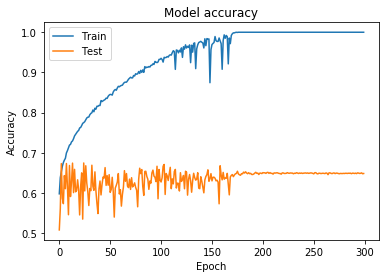

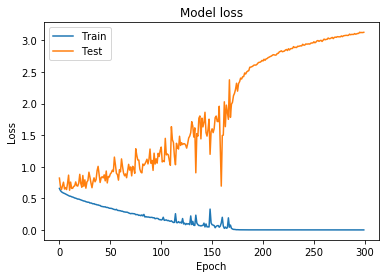

In [15]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
model.evaluate(um_train_features,um_train_labels)


25456/25456 [==============================] - 2s 66us/step


[0.20007077543309307, 0.9484208226203918]

In [6]:
x = np.random.randint(2, size=(1000,1))

In [7]:
x

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    